# Data exploration regarding strategies to deal with the Covid-19 outbreak
## by Leopold Walther

## Preliminary Wrangling

> The main question which made me start the analysis is: What is the best strategy for a state to battle the Covid-19 outbreak. There are several debates on how to act on overcoming this global pandemic. There are goverments that want to prevent overburdening of the health system through the lockdown like the spanish or german, while other countries rely on the responsibility of the individual without major restrictions, namely the swedish. Futhermore, there are governments that do not see any danger through the virus for their population or at least evaluate the economic damage through a lockdown more dramatically than the effects of the virus itself. Data was gathered from Wikipedia, Gapminder and the John Hopkins University. The amount of confirmed cases of Covid-19, deaths and recovered of the John Hopkins Data paired with information like intensive care beds retrieved from wikipedia ist the basis of this analysis. With this data the outbreaks timelines of different countries can be compared in the context of their strategies.

In [1]:
# One dimensional
    #Countries with highest death rates (bar chart) --> what is real death rate?
    #

# Two dimensional
    # Corona Virus Cases overt time per country line? (umeric discrecte vs numeric continouos) --> zoom in on not extreme countries
    # R-factor of countries over time
    # monthly/weekly deaths compared to "normal years" --> Sweden compared to other nordic countries

# Multi dimensional
    # comparison of share of single person households, share of population over 65, 
        #population per sqm, percentage living in cities, diabetes
        # Heatmap Countries cases?? https://medium.com/@tomaspueyo/coronavirus-learning-how-to-dance-b8420170203e
        
# other constructions
    # How long would it last to make 2/3 immun without vaccine? -->
    # Minimum Deaths when all infected and no vaccine, but enough medical care vs maximum death when hospitals overhelmed



In [50]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
from datetime import date
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sb
sb.set()

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [51]:
# Read Covid-19 data from csv
df_covidCases_Timeline = pd.read_csv('outputData/df_covidCases_Timeline.csv')
df_covidTests_Snapshot = pd.read_csv('outputData/df_covidTests_Snapshot.csv')
df_countryMetrics_Snapshot = pd.read_csv('outputData/df_countryMetrics_Snapshot.csv')
df_householdsEU_Timeline = pd.read_csv('outputData/df_householdsEU_Timeline.csv')
df_hospitals_Snapshot = pd.read_csv('outputData/df_hospitals_Snapshot.csv')
df_populationDelta_Timeline = pd.read_csv('outputData/df_populationDelta_Timeline.csv')

In [52]:
# Datatype datetime gets lost with write & read csv
df_covidCases_Timeline.date=pd.to_datetime(df_covidCases_Timeline.date)

In [53]:
# Check if datatype of date now correct
df_covidCases_Timeline.dtypes

Unnamed: 0             int64
country               object
date          datetime64[ns]
fatal                  int64
confirmed              int64
recovered              int64
iso_code              object
dtype: object

In [54]:
# Get dates of today and yesterday depending on day script is run
today = pd.to_datetime(date.today())
yesterday = pd.to_datetime(date.today() - timedelta(days=1))

### What is the structure of your dataset?

> Your answer here!

### What is/are the main feature(s) of interest in your dataset?

> Your answer here!

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Your answer here!

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

The novel Covid 19 virus spread all over the world in only a few months. It is still not clear what the exact mortality rate of Covid-19 is. We will use the data collected by John Hopkins University on confirmed cases and deaths. Dividing the fatal cases of a country for the most recent available date by the confirmed cases of the same country and date gives a mortality rate. This rate may be far from reality, as the confirmed cases of Covid-19 may not necessarily correspond to the actual number of cases. This also applies to the number of deaths caused by Covid-19. Different countries and regions have different rules as to when a death is included in the statistics of deaths caused by Covid-19. Furhermore, the number of known Covid-19 infections for a country depends on the number of tests performed. The more a country tests, the closer the number of confirmed infections should be to the actual number of infections present. When the decentrally collected figures are combined, delays or individual errors may introduce further uncertainties into the statistics. In the following graphic the mortality rate of Covid-19 is depicted for the 10 countries with the highest amount of infections based on data gathered by the John Hopkins University.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


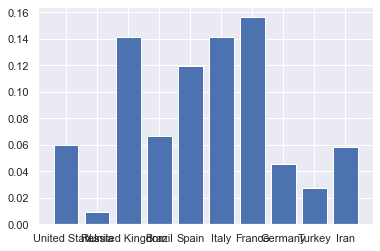

In [66]:
# get current data for yesterday only
df_covidCases_today = df_covidCases_Timeline.query('date >= @yesterday')

# create column fatal per confirmed
df_covidCases_today['fatalPerConfirmed'] = df_covidCases_today.fatal / df_covidCases_today.confirmed

# get 10 countries with most cases 

# Make a dataset:
countries = list(df_covidCases_today.sort_values('confirmed', ascending=False).head(10)['country'])
fatalPerConfirmed = list(df_covidCases_today.sort_values('confirmed', ascending=False).head(10)['fatalPerConfirmed'])


y_pos = np.arange(len(countries))
 
# Create bars
plt.bar(y_pos, fatalPerConfirmed)
 
# Create names on the x-axis
plt.xticks(y_pos, countries)
 
# Show graphic
plt.show()


The mortality rate depends on a lot of different factors like age, healthcare system of the country, 



In [ ]:

# create column deaths per population




In [ ]:
# covid deaths per x inhabitants
# death rates


> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Your answer here!

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [ ]:
# households for each nordic country
sb.countplot(data=df_countryMetrics_Snapshot, x=)



### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
# cited from: https://www.rrighart.com/blog-covid19/a-jupyter-notebook-for-visualizing-the-covid-19-pandemic

    
    if pop == 'area' or pop == 'inhabitants': 
        dat[pop] = dat[pop].div(number)
        dat['yvalue'] = dat['metric'].div(dat[pop])
    else: dat['yvalue'] = dat['metric'].copy() 
    
    dat = dat[(dat['date']>=date1) & (dat['date']<=date2)]
    colors = mpl.cm.tab20(np.linspace(0,1,len(countries)))
    plt.figure(figsize = (16, 8))

    countries = list(dat.loc[(dat['Country/Region'].isin(countries)) & (dat['date']==dat['date'].max()), ['Country/Region', 'yvalue']].sort_values(by='yvalue', ascending=False)['Country/Region'])
    
    for i,j in zip(countries, np.arange(0,len(countries))):
        plt.plot(dat[dat['Country/Region'] == i]['date'], dat[dat['Country/Region'] == i]['yvalue'], label=i, marker='o', color=colors[j])
    plt.xticks(rotation='vertical')
    plt.ylabel('Number of '+filename+' Cases')
    plt.title(title, fontsize=16)
   
    plt.legend()
    plt.savefig('covid.png')